## Homework 2
## Name: Yuqian Wang, Jihan Gao
## Course: CMSC320
## Instructor: John Dickerson

## Part 1: Wrangling
### Problem 1

In [ ]:
import sqlite3
import pandas
import numpy as np

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

teams_query = "SELECT yearID, teamID, franchID, W, G FROM Teams"
salary_query ="SELECT yearID, teamID, sum(salary) as total_payroll FROM Salaries GROUP BY yearID,teamID "
teams = pandas.read_sql(teams_query, conn)
team_salary = pandas.read_sql(salary_query, conn)
teams["win_percentage"] = teams["W"] / teams["G"] * 100
import matplotlib.pyplot as plt
d = pandas.merge(teams, team_salary, on = ['yearID', 'teamID'])
print(d)


### Analysis: We use inner merge method to combine team and team salary table. The merge method could check missing data of teams in each year and delete data which is not included in both table. 

## Part 2:  Exploratory Data Analysis

### Payroll Distribution

### Problem 2

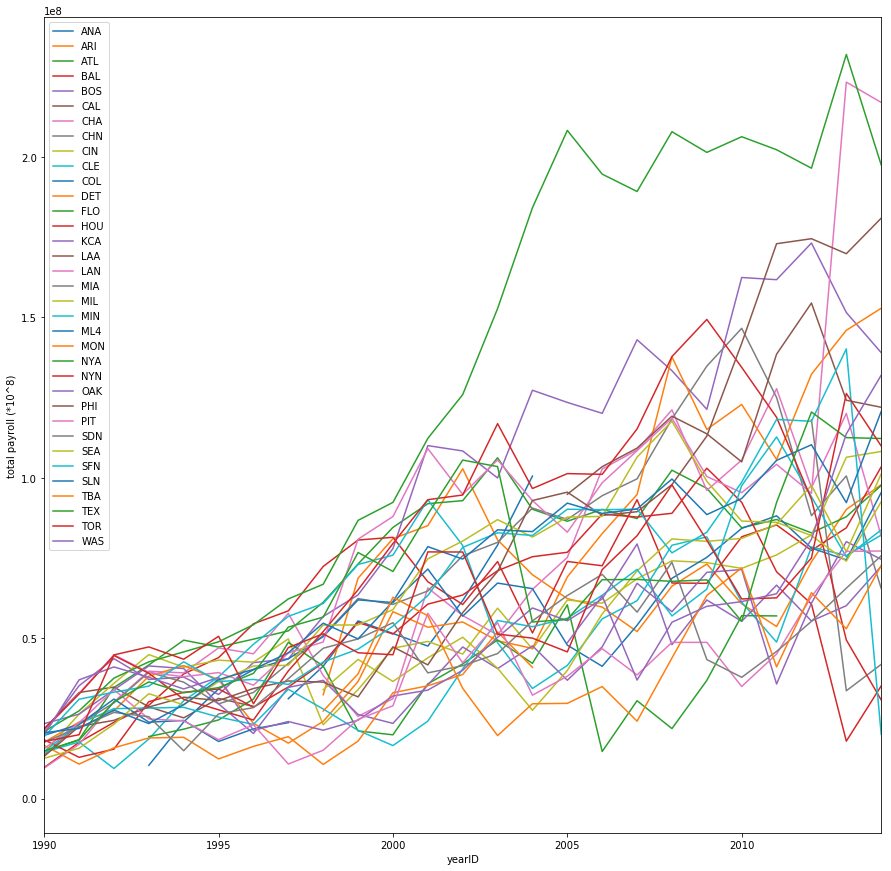

In [219]:
fig, ax = plt.subplots(figsize=(15,15))
team_groups = d.groupby('teamID')
for key,group in team_groups:
    group.plot(x = 'yearID', y = 'total_payroll', ax = ax, label = key)

ax.set_xlim([1990,2014])
plt.ylabel('total payroll (*10^8)')
plt.show()

### Question 1:
  Statement 1: There is an increasing trend for payrolls over years

  Statement 2: Between 1990 and 1995, total payrolls for each team are quite similar. While in later years, they differ vastly from each other. 

  Statement 3: The standard deviation of total payrolls grows larger as time increases. 
    

### Problem 3:
#### We are going to verify statement 1 : There is an increasing trend for payrolls over years. 

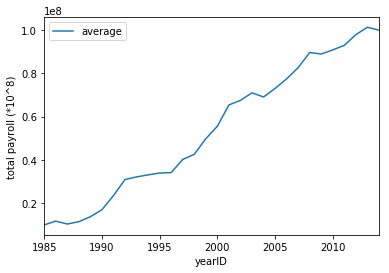

         average           std  yearID
0   1.007557e+07  2.422863e+06    1985
1   1.184056e+07  3.125068e+06    1986
2   1.048367e+07  3.773604e+06    1987
3   1.155586e+07  3.320570e+06    1988
4   1.384599e+07  3.499540e+06    1989
5   1.707235e+07  3.698588e+06    1990
6   2.357879e+07  6.760779e+06    1991
7   3.098244e+07  8.972909e+06    1992
8   3.220500e+07  9.066120e+06    1993
9   3.313701e+07  8.375066e+06    1994
10  3.398105e+07  9.277750e+06    1995
11  3.417798e+07  1.049593e+07    1996
12  4.026021e+07  1.282538e+07    1997
13  4.260943e+07  1.512229e+07    1998
14  4.980762e+07  2.021574e+07    1999
15  5.553784e+07  2.105626e+07    2000
16  6.535544e+07  2.429242e+07    2001
17  6.746925e+07  2.427717e+07    2002
18  7.094207e+07  2.754114e+07    2003
19  6.902220e+07  3.227241e+07    2004
20  7.295711e+07  3.360037e+07    2005
21  7.738242e+07  3.172264e+07    2006
22  8.255630e+07  3.333715e+07    2007
23  8.949529e+07  3.716663e+07    2008
24  8.882423e+07  3.32880

In [220]:

years = []
averages = []
std = []
year_groups = d.groupby('yearID')
for key, group in year_groups:
    averages.append(np.mean(group['total_payroll']))
    years.append(key)
    std.append(np.std(group['total_payroll']))

d2 = pandas.DataFrame({'yearID' : years, 'average' : averages, 'std' : std})
d2.plot(x = 'yearID', y = 'average')
plt.ylabel('total payroll (*10^8)')
plt.show()
print(d2)

#### Conclusion: By plotting the mean of total payroll for each year, we are able to verify the statement to be true.

### Correlation between payroll and winning percentage
### Problem 4

[  2.12728242e-07   4.38956724e+01]
27177542.300000012
[  3.23646122e-07   3.67462780e+01]
39951612.461458325
[  1.44541252e-07   4.04913180e+01]
65665360.05333333
[  9.56872943e-08   4.21244653e+01]
82243071.10666665
[  6.06066344e-08   4.40727810e+01]
95271640.2612903


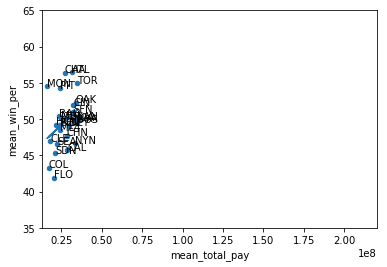

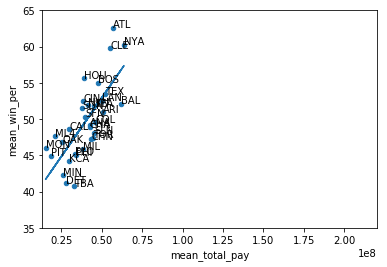

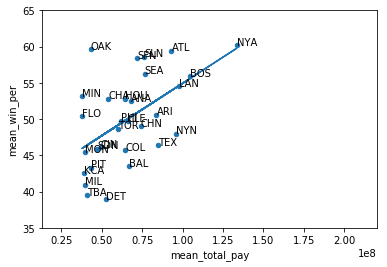

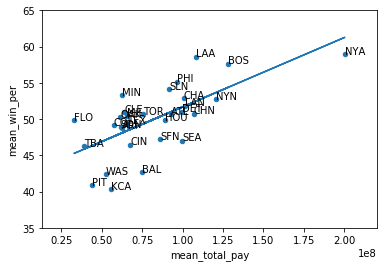

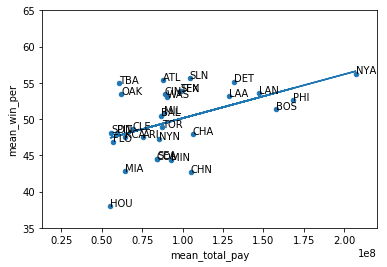

In [221]:
year_cutlst = pandas.cut(d['yearID'], [1989,1994,1999,2004,2009,2014], right = True, labels = ['1990-1994', '1995-1999', '2000-2004','2005-2009','2010-2014'] )
d['year_cut'] = year_cutlst
d3 = []
year_group = d.groupby('year_cut')
count = 0
for key, group in year_group:
    team_group = group.groupby('teamID')
    mean_win_per = []
    mean_total_pay = []
    team_id = []
    count = count + 1
    for key2, group2 in team_group:
        mean_win_per.append(np.mean(group2['win_percentage']))
        mean_total_pay.append(np.mean(group2['total_payroll']))
        team_id.append(key2)
        
    d3.append(pandas.DataFrame({'teamID': team_id , 'mean_win_per': mean_win_per, 'mean_total_pay':mean_total_pay}))


for frame in d3:
    frame.plot.scatter(x = 'mean_total_pay', y = 'mean_win_per' )
    z = np.polyfit(frame['mean_total_pay'], frame['mean_win_per'], deg = 1, full = False)
    print(z)
    plt.plot(frame['mean_total_pay'], z[0]*frame['mean_total_pay'] + z[1])
    plt.xlim(13000000,220000000)
    plt.ylim(35,65)
    for index, row in frame.iterrows():
        plt.annotate(row['teamID'],  xy = (row["mean_total_pay"], row["mean_win_per"]))
    print(frame['mean_total_pay'].mean())


plt.show()
    

#### Description of plots: This plot illustrate the relation between mean winning percentage and mean total pay roll by each teams in 5 different time periods.  The slope of regression line is decreasing across the time and also show positive relations between x value and y value. 

 

### Question 2 :
 1) By comparing the mean total payroll for each period, we find that the amount of payroll is increasing over time.
 
 2) After comparing five plots, we find that team CLE and DET in particular stands out as being good at paying for wins across times. We cannot simply compare the amount of total payroll across time. Instead we need to take inflation into consideration. When these two teams were given lower pays compared to others, they yielded lower winning percentage and vice versa. Thus we conclude that Team CLE and DET are good at paying for wins.
 
 3) An efficient team should have a bigger value of slope than other teams. In each diagram, Team OAK has a relatively bigger slope value. It reached its peak in year 1999-2004.


## Part 3: Data Transformations
### Standardizing across years

### Problem 5:

In [222]:
standard_pay = []
for index, line in d.iterrows():
    index_year = d2['yearID'].tolist().index(line['yearID'])
    cal_result = (line['total_payroll'] - d2.get_value(index_year, 'average'))/d2.get_value(index_year, 'std')
    standard_pay.append(cal_result)

d['standard_payroll'] = standard_pay
print(d)

     yearID teamID franchID    W    G  win_percentage  total_payroll  \
0      1985    BAL      BAL   83  161       51.552795     11560712.0   
1      1985    BOS      BOS   81  163       49.693252     10897560.0   
2      1985    CAL      ANA   90  162       55.555556     14427894.0   
3      1985    CHA      CHW   85  163       52.147239      9846178.0   
4      1985    CLE      CLE   60  162       37.037037      6551666.0   
5      1985    DET      DET   84  161       52.173913     10348143.0   
6      1985    KCA      KCR   91  162       56.172840      9321179.0   
7      1985    MIN      MIN   77  162       47.530864      5764821.0   
8      1985    ML4      MIL   71  161       44.099379     11284107.0   
9      1985    NYA      NYY   97  161       60.248447     14238204.0   
10     1985    OAK      OAK   77  162       47.530864      9058606.0   
11     1985    SEA      SEA   74  162       45.679012      4613000.0   
12     1985    TEX      TEX   62  161       38.509317      76765

### Problem 6

[  1.5031134   49.77869759]
[  4.5775227   49.89607591]
[  3.57125782  49.9826713 ]
[  3.2343021   49.99408222]
[  2.41721126  49.9110148 ]


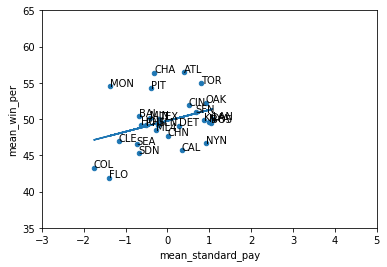

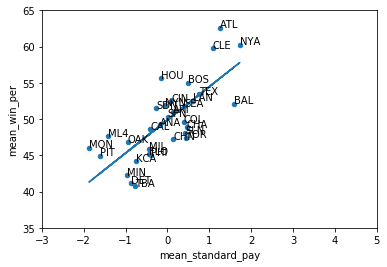

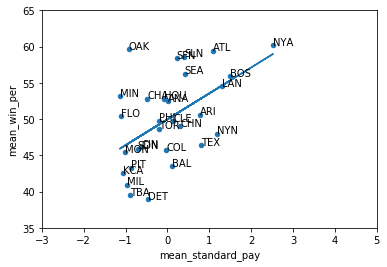

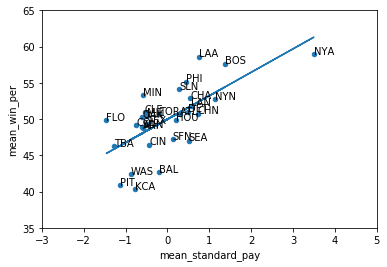

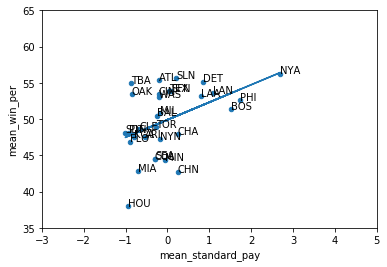

In [223]:
year_cutlst = pandas.cut(d['yearID'], bins = [1989, 1994, 1999, 2004, 2009, 2014], right = True, labels = ['1990-1994', '1995-1999', '2000-2004','2005-2009','2010-2014'] )
d['year_cut'] = year_cutlst
d3 = []
year_group = d.groupby('year_cut')
count = 0
for key, group in year_group:
    team_group = group.groupby('teamID')
    mean_win_per = []
    mean_standard_pay = []
    teamIDs = []
    count = count + 1
    for key2, group2 in team_group:
        mean_win_per.append(np.mean(group2['win_percentage']))
        mean_standard_pay.append(np.mean(group2['standard_payroll']))
        teamIDs.append(key2)
    d3.append(pandas.DataFrame({'teamID': teamIDs, 'mean_win_per': mean_win_per, 'mean_standard_pay':mean_standard_pay}))
    


for frame in d3:
    frame.plot.scatter(x = 'mean_standard_pay', y = 'mean_win_per'   )
    z = np.polyfit(frame['mean_standard_pay'], frame['mean_win_per'], deg = 1, full = False)
    print(z)
    plt.plot(frame['mean_standard_pay'], z[0]*frame['mean_standard_pay'] + z[1])
    plt.xlim(-3,5)
    plt.ylim(35,65)
    for idx, row in frame.iterrows():
        plt.annotate(row['teamID'], xy = (row["mean_standard_pay"], row["mean_win_per"]))
    
plt.show()

### Question 3:
After transforming the data, we are able to compare the relative payroll by simply comparing x values, which makes things a lot easier. By analyzing the plots, we find two additional groups, HOU and ARI, that also shows a good ability at  paying to win. 

## Expected wins
### Problem 7

[  2.4815091   49.98405186]


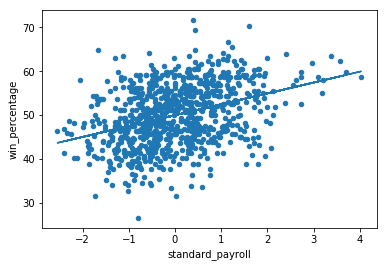

In [224]:
d.plot.scatter(x = 'standard_payroll', y = 'win_percentage')
z = np.polyfit(d['standard_payroll'], d['win_percentage'] , deg = 1, full = False)
print(z)

plt.plot(d['standard_payroll'], z[0]*d['standard_payroll'] + z[1])
plt.show()

#### Analyze: The scatter plot illustrate the relation between standard payroll and win percentage across time. The regression line shows an increasing trend od win percentage as the standard payroll increased.  

### Spending efficiency
### Problem 8

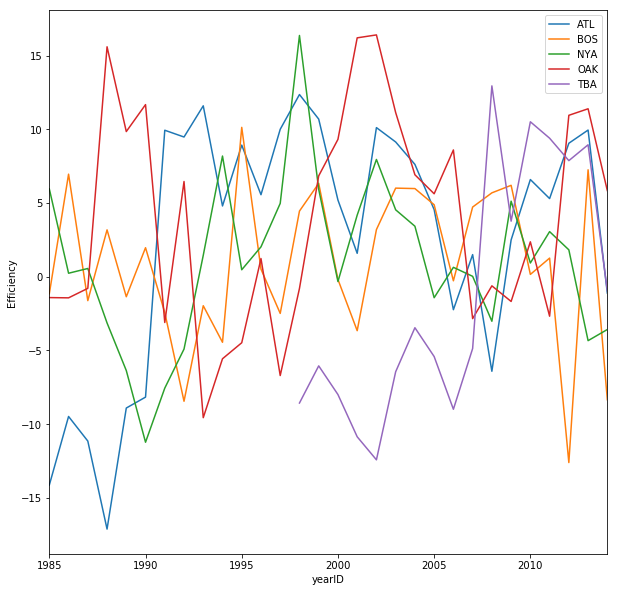

In [225]:
efficiency = []
for index, line in d.iterrows():
    efficiency.append(line['win_percentage'] - (50 + 2.5*line['standard_payroll']))

d['efficiency'] = efficiency
fig, ax = plt.subplots(figsize=(10,10))
team_groups = d.groupby('teamID')
for key,group in team_groups:
    if key == 'OAK':
        group.plot(x = 'yearID', y = 'efficiency', ax = ax, label = key)
    elif key == 'BOS':
        group.plot(x = 'yearID', y = 'efficiency', ax = ax, label = key)
    elif key == 'NYA':
        group.plot(x = 'yearID', y = 'efficiency', ax = ax, label = key)
    elif key == 'ATL':
        group.plot(x = 'yearID', y = 'efficiency', ax = ax, label = key)
    elif key == 'TBA':
        group.plot(x = 'yearID', y = 'efficiency', ax = ax, label = key)


        
plt.ylabel('Efficiency')
plt.show()


### Question 4:
A negative efficiency value in the plot means that with larger payroll, the team has lower winning percentage than expected, which means the team is inefficient in spending. 

It is obvious from the histogram that the efficiency of Team OAK was quite low between 1990 to 2000. Its efficiency begins to boost around year 2000 and reaches highest value in year 2000-2005. The other teams also saw an increase in efficiency in later years between 2000 and 2005. 